## Module 4: Riding the Demand

### Initial Cleaning:

In [31]:
# imports
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy-Modules/Mod4/M4-Final-Project/data/hour.csv')
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


***
### Checking column types 
#### types 
###### types 

In [7]:
# check column types
df.dtypes

# let's change dteday to datetime
df['dteday'] = pd.to_datetime(df['dteday'])
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

***
### Checking Nulls:

In [8]:
# checking for Nan
for column in df:
    print(f'Column Name: {column}             Null Values: {df[column].isna().sum()}')

Column Name: instant             Null Values: 0
Column Name: dteday             Null Values: 0
Column Name: season             Null Values: 0
Column Name: yr             Null Values: 0
Column Name: mnth             Null Values: 0
Column Name: hr             Null Values: 0
Column Name: holiday             Null Values: 0
Column Name: weekday             Null Values: 0
Column Name: workingday             Null Values: 0
Column Name: weathersit             Null Values: 0
Column Name: temp             Null Values: 0
Column Name: atemp             Null Values: 0
Column Name: hum             Null Values: 0
Column Name: windspeed             Null Values: 0
Column Name: casual             Null Values: 0
Column Name: registered             Null Values: 0
Column Name: cnt             Null Values: 0


***
### Checking for user count logic:

In [9]:
# checking if casual+registered columns = cnt column

casual_count = df['casual'].sum()
registered_count = df['registered'].sum()
cnt_count = df['cnt'].sum()

if casual_count + registered_count == cnt_count:
    print('columns match')
else:
    print("columns don't match")

columns match


***
### A little feature engineering...

In [10]:
# season names column
season_names = []
for row in df['season']:
    if row == 1:
        season_names.append('Spring')
    elif row == 2:
        season_names.append('Summer')
    elif row == 3:
        season_names.append('Fall')
    elif row == 4:
        season_names.append('Winter')
    else:
        season_names.append('Unknown')
df['season_names'] = season_names

#Month names column
df['month_names'] = df['dteday'].dt.month_name()

#Days name column
df['day_name'] = df['dteday'].dt.day_name()
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_names,month_names,day_name
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Spring,January,Saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Spring,January,Saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Spring,January,Saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Spring,January,Saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Spring,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Spring,December,Monday
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Spring,December,Monday
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Spring,December,Monday
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Spring,December,Monday


***
### Aaaaand sending out CSV:

In [11]:
# not much else: sending out cleaned csv

df.to_csv('/Users/Marcy_Student/Desktop/Marcy-Modules/Mod4/M4-Final-Project/data/cleaned_hour.csv')

***

## EDA

#### What are the busiest months? days? hours?

In [12]:
# seasonal count
seasonal_count = df.groupby('season_names')['cnt'].sum().reset_index()


# monthly count
monthly_count = df.groupby('month_names')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)


# daily count
daily_count = df.groupby(['weekday', 'day_name'])['cnt'].sum().reset_index().sort_values(by='weekday', ascending=True)



#hourly count
hourly_count = df.groupby('hr')['cnt'].sum().reset_index()


print(seasonal_count.max(), monthly_count.max(), daily_count.max(), hourly_count.max())

season_names     Winter
cnt             1061129
dtype: object month_names    September
cnt               351194
dtype: object weekday             6
day_name    Wednesday
cnt            487790
dtype: object hr         23
cnt    336860
dtype: int64


***

### Checking during holidays:

In [13]:
# counting holiday users I suppose
holidays_df = df[df['holiday']==1]

holidays_df.groupby(['mnth', 'month_names'])[['casual', 'registered', 'cnt']].sum().reset_index().sort_values(by='mnth', ascending=True)

,mnth,month_names,casual,registered,cnt
0,1,January,578,4671,5249
1,2,February,697,3539,4236
2,4,April,1840,7656,9496
3,5,May,4106,6035,10141
4,7,July,5627,7819,13446
5,9,September,3201,6184,9385
6,10,October,2388,8207,10595
7,11,November,3052,10505,13557
8,12,December,870,1460,2330


***
### checking popular days during weekends:

<BarContainer object of 24 artists>

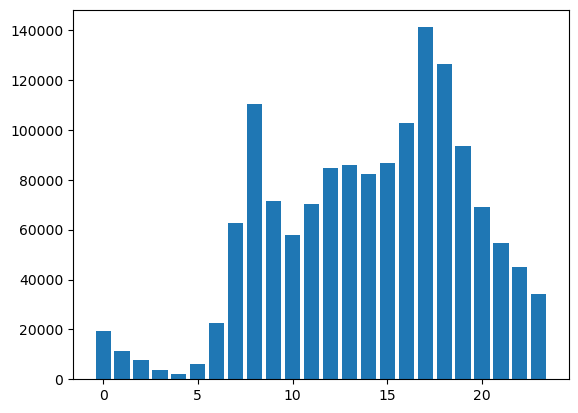

In [38]:
# finding busiest times during busiest days
df_top3_days = df[df['weekday'].isin([4,5,6])]
grouped_df1 = df_top3_days.groupby('hr')['cnt'].sum().reset_index()

# visualizing real quick
plt.bar(grouped_df1['hr'], grouped_df1['cnt'])

<BarContainer object of 24 artists>

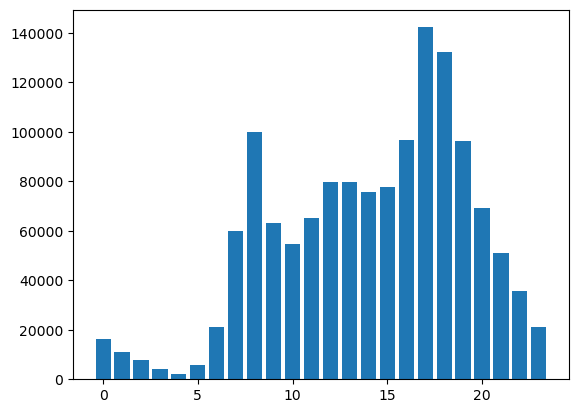

In [39]:
# and the opposite
df_least3_days = df[df['weekday'].isin([0,1,2])]
grouped_df2 = df_least3_days.groupby('hr')['cnt'].sum().reset_index()

# visualizing real quick
plt.bar(grouped_df2['hr'], grouped_df2['cnt'])

***